In [178]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

In [119]:
#Importar os dados
df = pd.read_csv('base_dummy.csv')

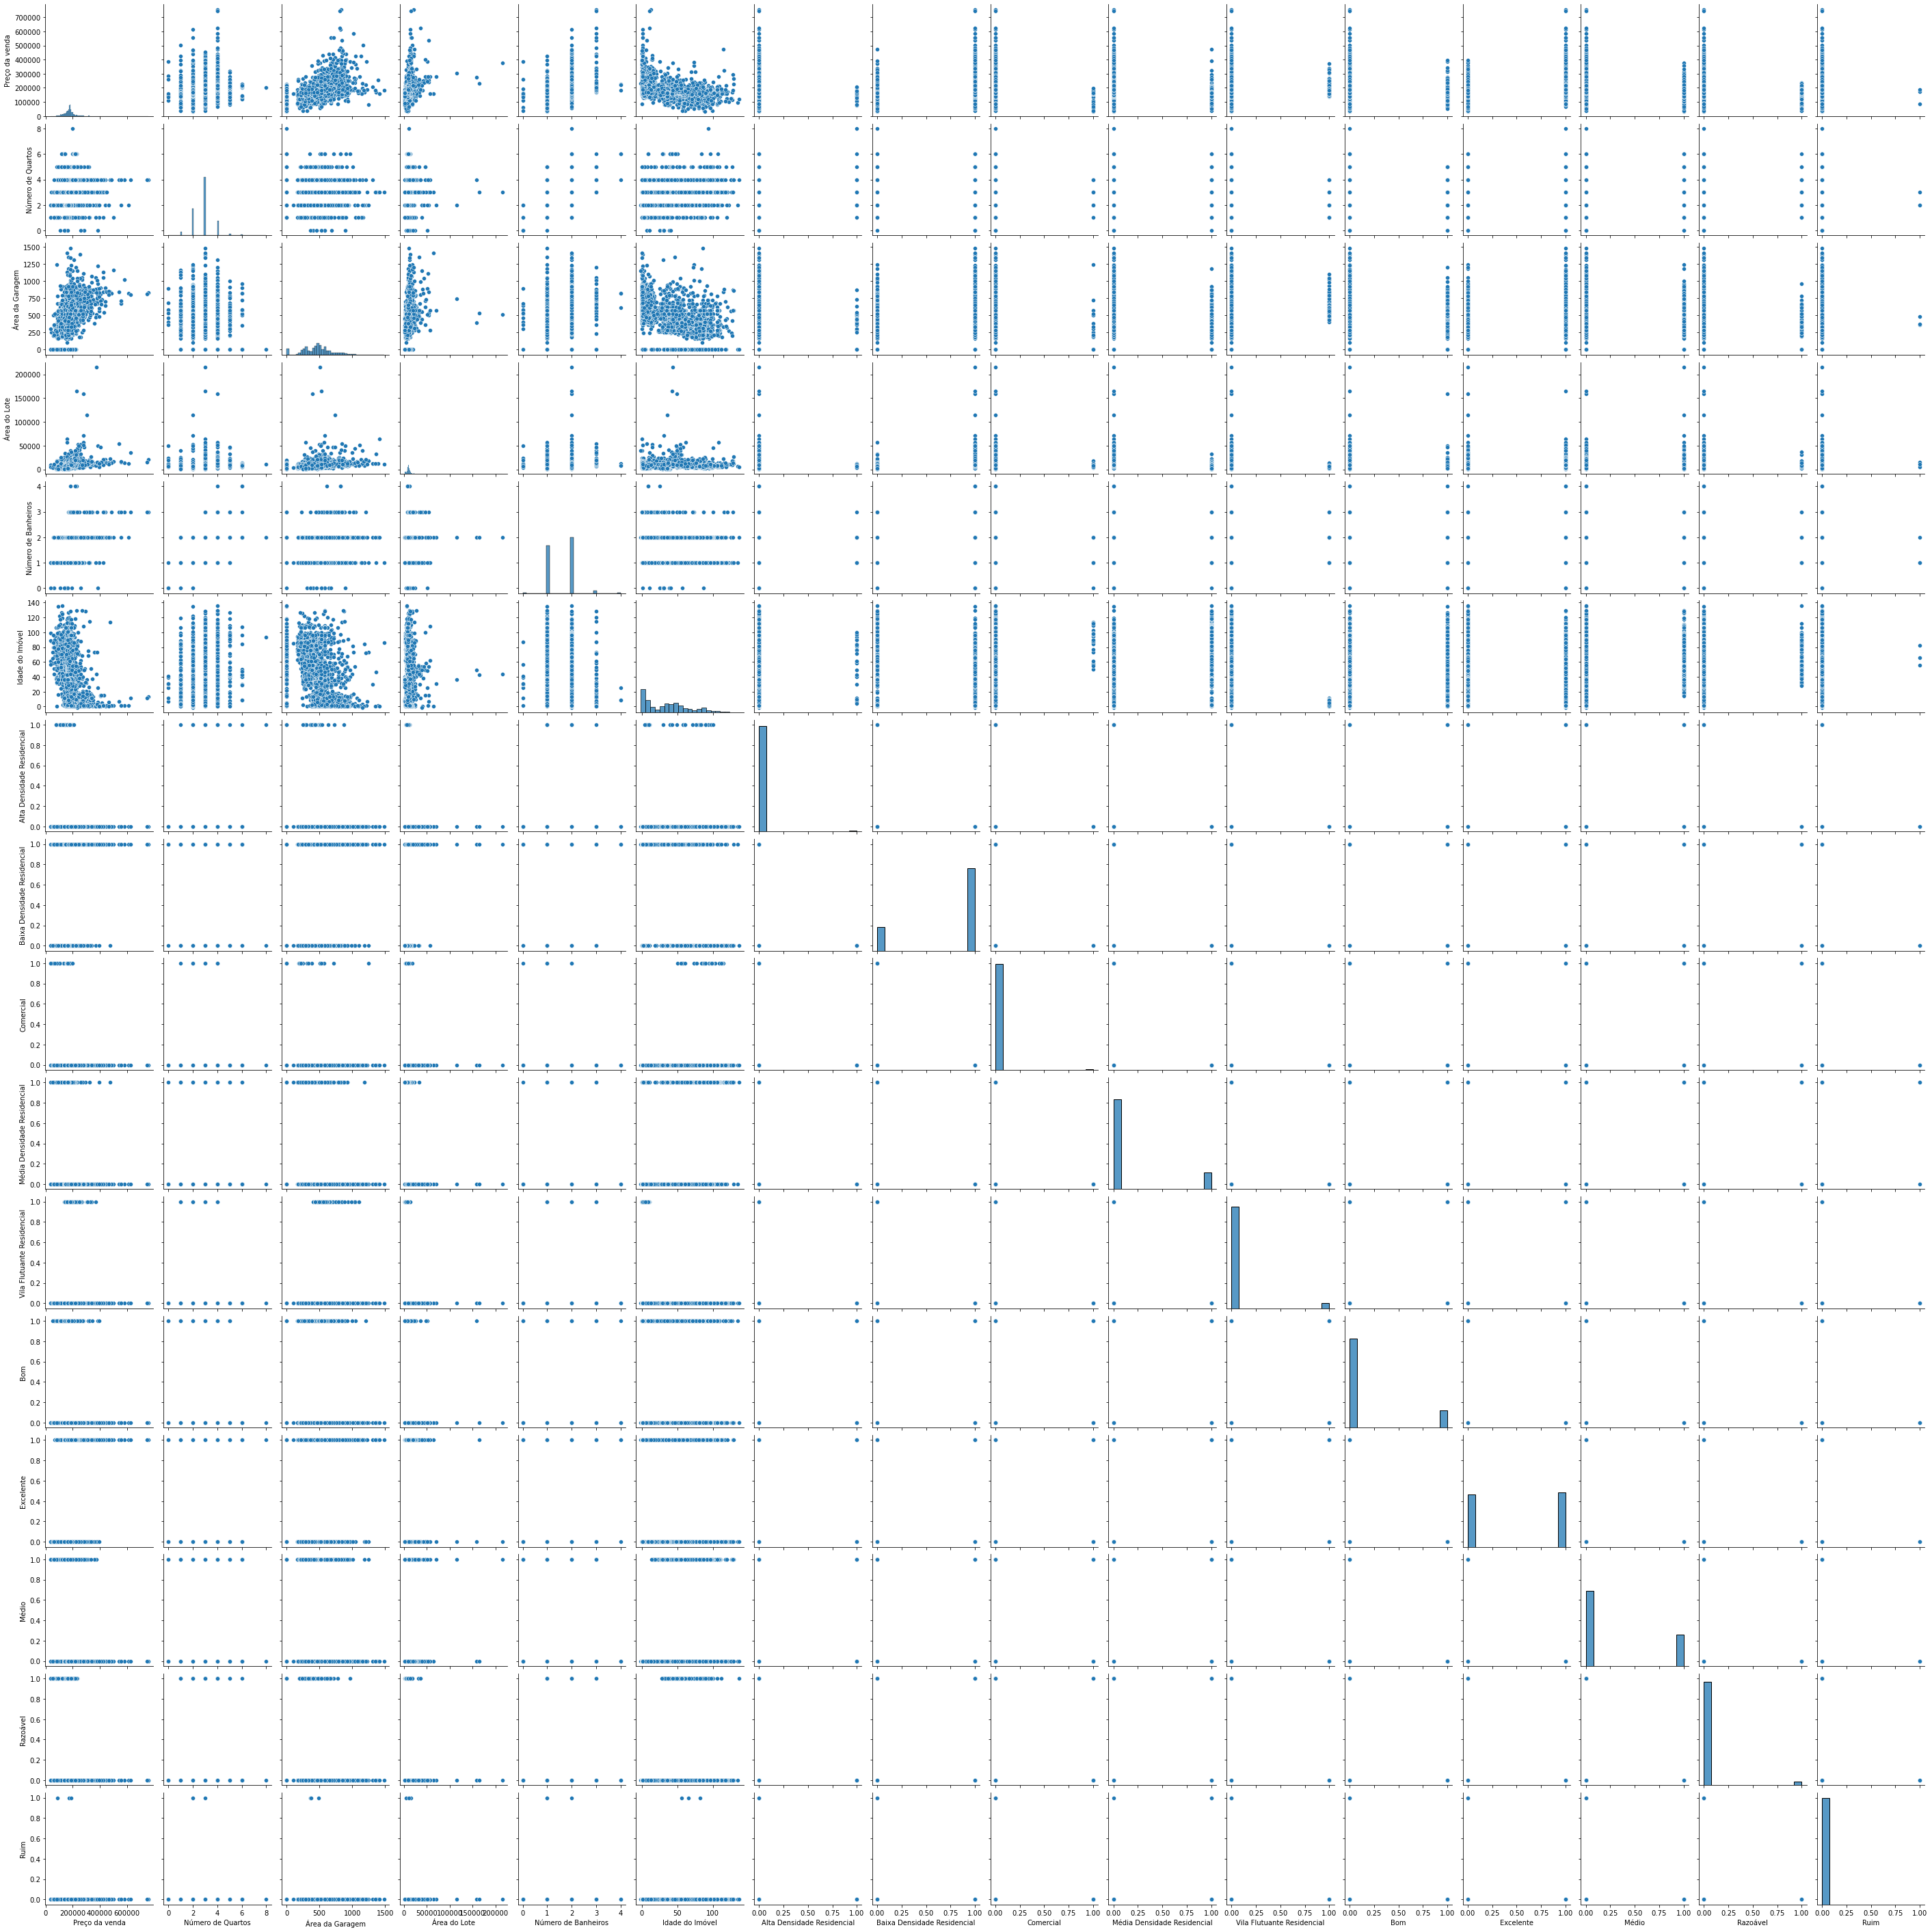

In [120]:
g = sns.pairplot(df)

# Adicionei coluna que fala se havia ou não Ar Condicionado Central na residência

In [38]:
df_original = pd.read_csv('Base mesclada.csv')

In [73]:
objects = ['object']

df_original_objetos = df_original.select_dtypes(include=objects)

colunas_para_avaliar = df_original_objetos.columns

In [75]:
for col in colunas_para_avaliar:
    print(df_original_objetos.groupby([col],as_index=False).size())
    print()

  MSZoning  size
0  C (all)    25
1       FV   139
2       RH    26
3       RL  2265
4       RM   460

  Street  size
0   Grvl    12
1   Pave  2907

  Alley  size
0  Grvl   120
1  Pave    78

  LotShape  size
0      IR1   968
1      IR2    76
2      IR3    16
3      Reg  1859

  LandContour  size
0         Bnk   117
1         HLS   120
2         Low    60
3         Lvl  2622

  Utilities  size
0    AllPub  2916
1    NoSeWa     1

  LotConfig  size
0    Corner   511
1   CulDSac   176
2       FR2    85
3       FR3    14
4    Inside  2133

  LandSlope  size
0       Gtl  2778
1       Mod   125
2       Sev    16

   Neighborhood  size
0       Blmngtn    28
1       Blueste    10
2        BrDale    30
3       BrkSide   108
4       ClearCr    44
5       CollgCr   267
6       Crawfor   103
7       Edwards   194
8       Gilbert   165
9        IDOTRR    93
10      MeadowV    37
11      Mitchel   114
12        NAmes   443
13      NPkVill    23
14       NWAmes   131
15      NoRidge    71
16      Nr

Candidatos para variável dependentes:
- BsmtFinType1
- GarageFinish

In [102]:
df_original_objetos[['GarageFinish']].applymap(lambda x:str(x)).groupby(['GarageFinish']).size()

GarageFinish
Fin     719
RFn     811
Unf    1230
nan     159
dtype: int64

# Adicionei a base de dados as variáveis dependentes candidatas acima

In [121]:
colunas_escolhidas = ['BsmtFinType1','GarageFinish']
novas_colunas = ['Qualidade do acabamento do porão','Acabamento da Garagem']
df[novas_colunas] = df_original[colunas_escolhidas]

df.head()

,Preço da venda,Zona,Qualidade do Aquecimento,Número de Quartos,Área da Garagem,Área do Lote,Número de Banheiros,Idade do Imóvel,Alta Densidade Residencial,Baixa Densidade Residencial,Comercial,Média Densidade Residencial,Vila Flutuante Residencial,Bom,Excelente,Médio,Razoável,Ruim,Qualidade do acabamento do porão,Acabamento da Garagem
0,208500.0,Baixa Densidade Residencial,Excelente,3,548.0,8450,2,5,0,1,0,0,0,0,1,0,0,0,GLQ,RFn
1,181500.0,Baixa Densidade Residencial,Excelente,3,460.0,9600,2,31,0,1,0,0,0,0,1,0,0,0,ALQ,RFn
2,223500.0,Baixa Densidade Residencial,Excelente,3,608.0,11250,2,7,0,1,0,0,0,0,1,0,0,0,GLQ,RFn
3,140000.0,Baixa Densidade Residencial,Bom,3,642.0,9550,1,91,0,1,0,0,0,1,0,0,0,0,ALQ,Unf
4,250000.0,Baixa Densidade Residencial,Excelente,4,836.0,14260,2,8,0,1,0,0,0,0,1,0,0,0,GLQ,RFn


In [143]:
# Substituit o NaN pelo valor 'Nao possui'
def consertar(x):
    if str(x) == 'nan':
        return 'Nao possui'
    return x
    
df['Acabamento da Garagem'] = df[['Acabamento da Garagem']].applymap(consertar)
df['Qualidade do acabamento do porão'] = df[['Qualidade do acabamento do porão']].applymap(consertar)
df.isna().sum()

Preço da venda                      0
Zona                                4
Qualidade do Aquecimento            0
Número de Quartos                   0
Área da Garagem                     1
Área do Lote                        0
Número de Banheiros                 0
Idade do Imóvel                     0
Alta Densidade Residencial          0
Baixa Densidade Residencial         0
Comercial                           0
Média Densidade Residencial         0
Vila Flutuante Residencial          0
Bom                                 0
Excelente                           0
Médio                               0
Razoável                            0
Ruim                                0
Qualidade do acabamento do porão    0
Acabamento da Garagem               0
dtype: int64

In [156]:
# Excluir os valores NaN restantes
df = df.drop(df[df['Zona'].isna()].index)
df = df.drop(df[df['Área da Garagem'].isna()].index)
df.isna().sum()

Preço da venda                      0
Zona                                0
Qualidade do Aquecimento            0
Número de Quartos                   0
Área da Garagem                     0
Área do Lote                        0
Número de Banheiros                 0
Idade do Imóvel                     0
Alta Densidade Residencial          0
Baixa Densidade Residencial         0
Comercial                           0
Média Densidade Residencial         0
Vila Flutuante Residencial          0
Bom                                 0
Excelente                           0
Médio                               0
Razoável                            0
Ruim                                0
Qualidade do acabamento do porão    0
Acabamento da Garagem               0
dtype: int64

In [122]:
df.columns

Index(['Preço da venda', 'Zona', 'Qualidade do Aquecimento',
       'Número de Quartos', 'Área da Garagem', 'Área do Lote',
       'Número de Banheiros', 'Idade do Imóvel', 'Alta Densidade Residencial',
       'Baixa Densidade Residencial', 'Comercial',
       'Média Densidade Residencial', 'Vila Flutuante Residencial', 'Bom',
       'Excelente', 'Médio', 'Razoável', 'Ruim',
       'Qualidade do acabamento do porão', 'Acabamento da Garagem'],
      dtype='object')

In [157]:
# Verifico quais sao as variaveis nao categoricas
objects = ['object']
df_numerical = df.select_dtypes(exclude=objects)
colunas_para_LDA = df_numerical.columns
colunas_para_LDA

Index(['Preço da venda', 'Número de Quartos', 'Área da Garagem',
       'Área do Lote', 'Número de Banheiros', 'Idade do Imóvel',
       'Alta Densidade Residencial', 'Baixa Densidade Residencial',
       'Comercial', 'Média Densidade Residencial',
       'Vila Flutuante Residencial', 'Bom', 'Excelente', 'Médio', 'Razoável',
       'Ruim'],
      dtype='object')

## variável dependente: Qualidade do acabamento do porão

In [195]:
X = df[colunas_para_LDA]
y = df['Qualidade do acabamento do porão']

In [196]:
# Uso metodo holdout para separar conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Instancio o modelo LDA
lda = LinearDiscriminantAnalysis()

# Executo o algoritmo o treinamento do modelo
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

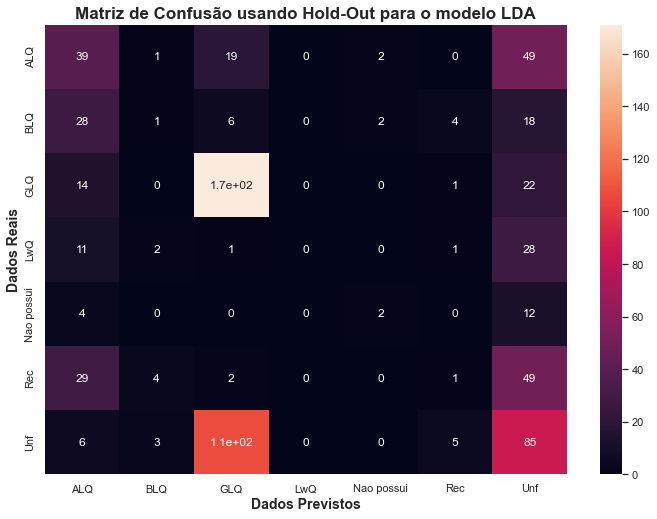

In [197]:
y_pred = lda.predict(X_test)
arr = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(arr, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, annot=True)
# ax.set(xlabel='Dados Previstos', ylabel='Dados Reais',fontdict={'fontsize':14,'fontweight':'bold'})
plt.xlabel("Dados Previstos",fontdict = {'fontsize':14,'fontweight':'bold'})
plt.ylabel("Dados Reais",fontdict = {'fontsize':14,'fontweight':'bold'})
sns.set(rc={'figure.figsize':(20,15)})
plt.title("Matriz de Confusão usando Hold-Out para o modelo LDA",fontdict = {'fontsize':17,'fontweight':'bold'})
plt.show()

In [198]:
# Separo conjunto de treinamento e teste para calculo da acuracidade real posterior
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Separo em 10 folds
scores = cross_val_score(lda, X_train, y_train, cv=10)
print('Acuracidade Média do Cross Validation (10 folds):', scores.mean())

Acuracidade Média do Cross Validation (10 folds): 0.40683465292614474


## variável dependente: Acabamento da Garagem

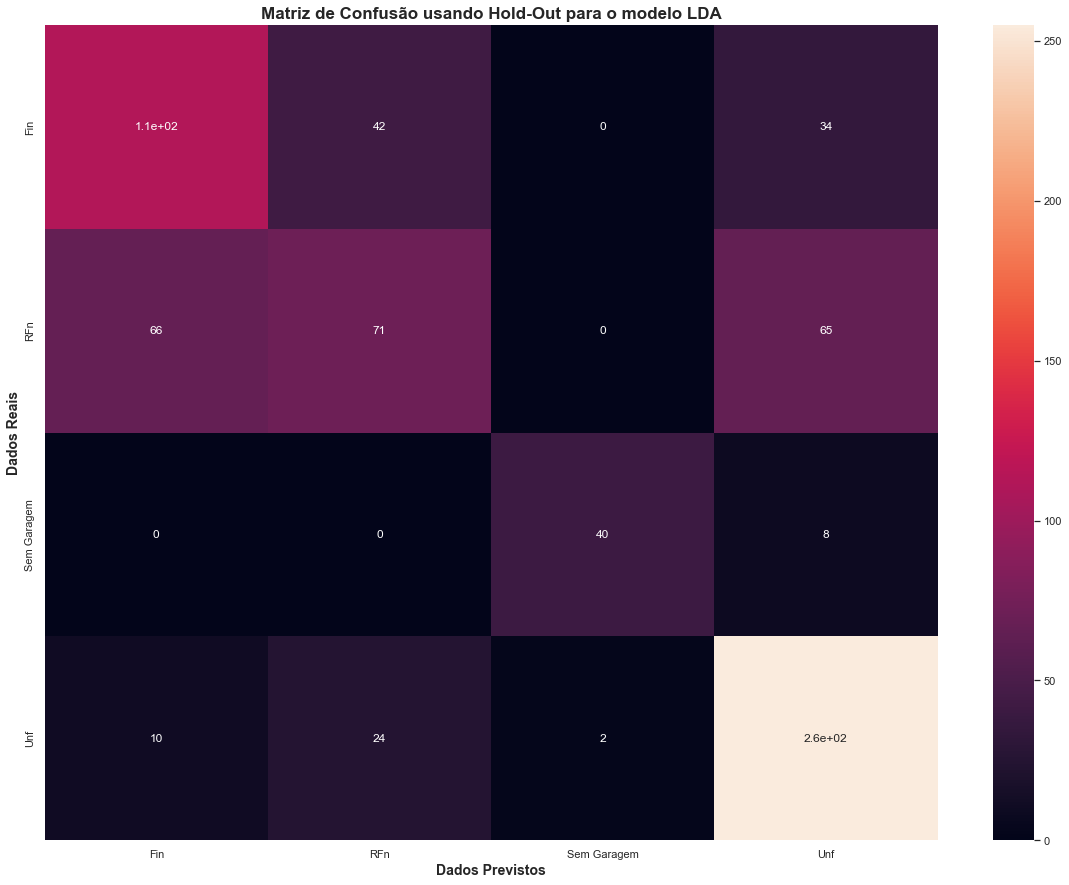

In [199]:
X = df[colunas_para_LDA]
y = df['Acabamento da Garagem']

# Uso metodo holdout para separar conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Instancio o modelo LDA
lda = LinearDiscriminantAnalysis()

# Executo o algoritmo o treinamento do modelo
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)
arr = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(arr, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, annot=True)
plt.xlabel("Dados Previstos",fontdict = {'fontsize':14,'fontweight':'bold'})
plt.ylabel("Dados Reais",fontdict = {'fontsize':14,'fontweight':'bold'})
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title("Matriz de Confusão usando Hold-Out para o modelo LDA",fontdict = {'fontsize':17,'fontweight':'bold'})
plt.show()

In [200]:
# Separo conjunto de treinamento e teste para calculo da acuracidade real posterior
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Separo em 10 folds
scores = cross_val_score(lda, X_train, y_train, cv=10)
print('Acuracidade Média do Cross Validation (10 folds):', scores.mean())

Acuracidade Média do Cross Validation (10 folds): 0.6173976791923254
